# The Sparks Foundation

## Data Science & Buisness Analytics Task
### Graduate Rotational Internship Program( Batch :- June 2021 )

### Name :- Siddhesh Shigwan (Intern)

### Prediction Using Supervised Machine Learning
#### Problem Statement
Predict the percentage of an student based on the no. of study hours.This is a simple linear regression problem as it involves just 2 variables.What will be predicted score if a student studies for 9.25 hrs/ day?
###### Data can be found at http://bit.ly/w-data


## Import all Necessary Library

In [1]:
import numpy as np
import pandas as pd
# Data Visualization library
import matplotlib.pyplot as plt
import seaborn as sns

## Read & Load data

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Data Inspection

In [4]:
data.shape

(25, 2)

In [5]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Exploratory data analysis

### Finding missing values

In [8]:
data.isna().sum().sort_values(ascending=False)

Scores    0
Hours     0
dtype: int64

### Finding Outliers

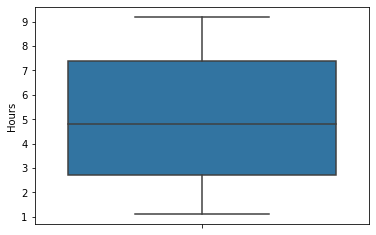

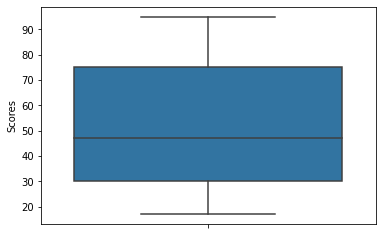

In [9]:
for x in data.columns:
    if data[x].dtypes != 'object':
        sns.boxplot(y=data[x])
        plt.show()

### Data Visualization

array([[<AxesSubplot:title={'center':'Hours'}>,
        <AxesSubplot:title={'center':'Scores'}>]], dtype=object)

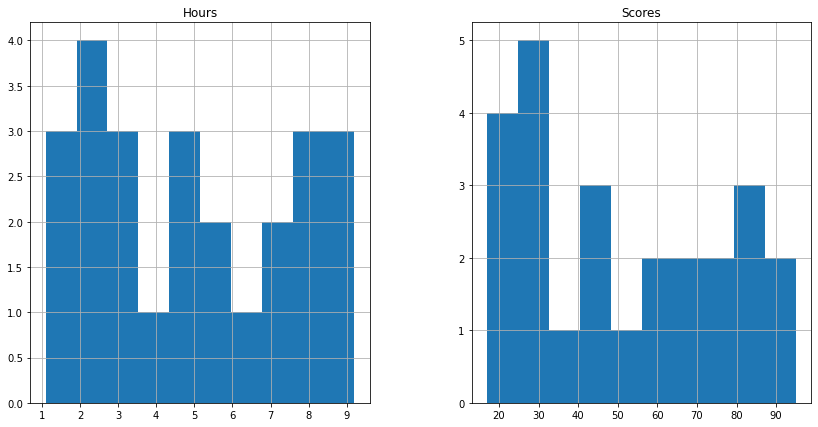

In [10]:
%matplotlib inline

data.hist(figsize=(14,7))

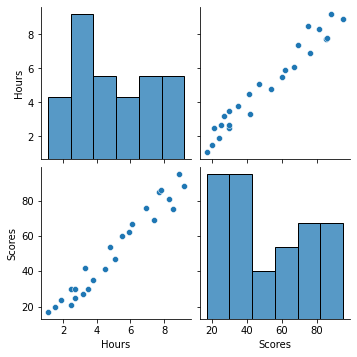

In [11]:
sns.pairplot(data,kind = "scatter")

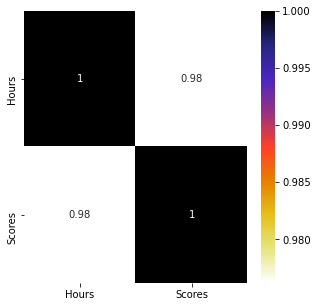

In [12]:
plt.figure(figsize=(5,5))
cor=data.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

C:\Users\Sid Shigwan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

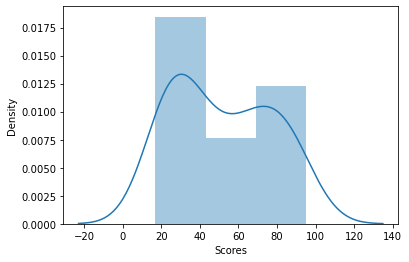

In [13]:
# finding the distribution of "Height" column
sns.distplot(data['Scores'])

C:\Users\Sid Shigwan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

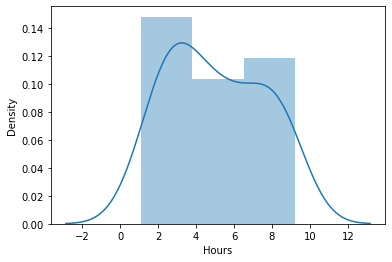

In [14]:
# finding the distribution of "Height" column
sns.distplot(data['Hours'])

## Create X & Y

In [15]:
X = data[["Hours"]]
Y = data['Scores']

## Split data into train & test

In [16]:
from sklearn.model_selection import train_test_split



X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
random_state=0)

In [17]:
Y_train.shape

(17,)

## Create Model

In [18]:
from sklearn.linear_model import LinearRegression

## Creationg A model Object

lr=LinearRegression()


## Train the model object
lr.fit(X_train, Y_train)


## Print LR line equation by printing Itercepts and Coefeeficient 
print(lr.intercept_)
print(lr.coef_)


2.370815382341881
[9.78856669]


In [19]:
Y_pred=lr.predict(X_test)
print(Y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


In [20]:
pred =pd.DataFrame({'Actual':Y_test, 'Predicted':Y_pred})
pred

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


## Evaluation

In [21]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("Accuracy:-",r2*100)

mse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("MSE:-",mse)


Accuracy:- 95.68211104435257
MSE:- 4.792191274636315


## Plot the Model

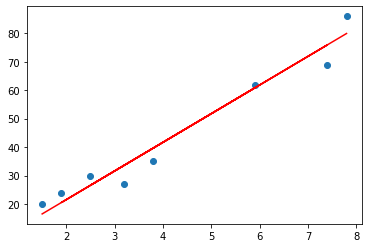

In [22]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,1.4054739079778429 + 10.06755514 *X_test, 'r')
plt.show()


#### What will be predicted score if a student studies for 9.25 hrs/ day?

In [24]:
hrs=float(input("Enter Time in Hours:-"))
Y_pred=lr.predict([[hrs]])
print("If a student studies for {} hours/day then he will score approx {}% marks".format(hrs,int(Y_pred[0])))

Enter Time in Hours:-9.25
If a student studies for 9.25 hours/day then he will score approx 92% marks
